In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

## ロジスティック回帰 (logistic curve)：p(X)=1/(1+exp(-a-bx))

## 対数オッズ　log(p/(1-p))=a+b*x+c*D


xn=薬の投与量　yn=死んだかどうか

[  0,   1,   5,  15,  50, 100]

In [13]:
df = pd. read_csv("http://mcobaya.web.fc2.com/rats.csv")
X_train, X_test, Y_train, Y_test = train_test_split(df['xn'], df['yn'], test_size=0.3, random_state=0) 

In [27]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train.to_numpy().reshape(-1, 1), Y_train)

LogisticRegression()

In [28]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[0.08181119]]
intercept =  [-2.80623879]


In [30]:
probs = lr.predict_proba(X_test.to_numpy().reshape(-1, 1))
print(probs)

[[0.93845277 0.06154723]
 [0.94301203 0.05698797]
 [0.91661223 0.08338777]
 [0.00461012 0.99538988]
 [0.91661223 0.08338777]
 [0.21681561 0.78318439]
 [0.93845277 0.06154723]
 [0.91661223 0.08338777]
 [0.91661223 0.08338777]
 [0.93845277 0.06154723]
 [0.82907289 0.17092711]
 [0.82907289 0.17092711]
 [0.91661223 0.08338777]
 [0.93845277 0.06154723]
 [0.91661223 0.08338777]
 [0.00461012 0.99538988]
 [0.82907289 0.17092711]
 [0.21681561 0.78318439]
 [0.21681561 0.78318439]
 [0.21681561 0.78318439]
 [0.91661223 0.08338777]
 [0.93845277 0.06154723]
 [0.21681561 0.78318439]
 [0.93845277 0.06154723]
 [0.21681561 0.78318439]
 [0.91661223 0.08338777]
 [0.94301203 0.05698797]
 [0.94301203 0.05698797]
 [0.00461012 0.99538988]
 [0.94301203 0.05698797]
 [0.94301203 0.05698797]
 [0.91661223 0.08338777]
 [0.21681561 0.78318439]
 [0.00461012 0.99538988]
 [0.93845277 0.06154723]
 [0.21681561 0.78318439]
 [0.00461012 0.99538988]
 [0.21681561 0.78318439]
 [0.91661223 0.08338777]
 [0.82907289 0.17092711]


#### モデルの評価

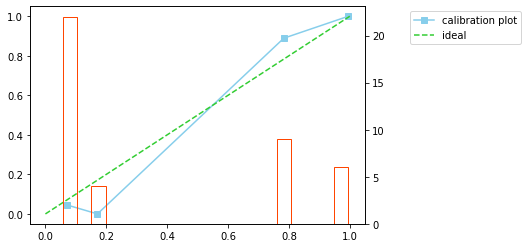

In [35]:
prob = lr.predict_proba(X_test.to_numpy().reshape(-1, 1))[:, 1] # 目的変数が1である確率を予測
prob_true, prob_pred = calibration_curve(y_true=Y_test, y_prob=prob, n_bins=20)

fig, ax1 = plt.subplots()
ax1.plot(prob_pred, prob_true, marker='s', label='calibration plot', color='skyblue') # キャリプレーションプロットを作成
ax1.plot([0, 1], [0, 1], linestyle='--', label='ideal', color='limegreen') # 45度線をプロット
ax1.legend(bbox_to_anchor=(1.12, 1), loc='upper left')
ax2 = ax1.twinx() # 2軸を追加
ax2.hist(prob, bins=20, histtype='step', color='orangered') # スコアのヒストグラムも併せてプロット
plt.show()

#横軸にprediction、縦軸に実際の確率をとる。　だからidealは45度線。

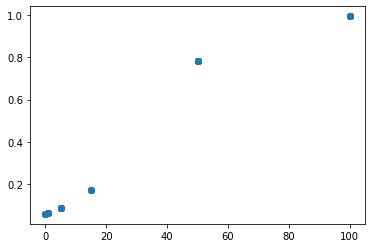

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_test, prob)

In [46]:
list1 = [i for i in range(101)]
probs2 = lr.predict_proba(np.reshape(list1, (-1, 1)))

In [55]:
probs[:, 1].shape

(41,)

In [51]:
np.reshape(list1, (-1, 1)).shape

(101, 1)

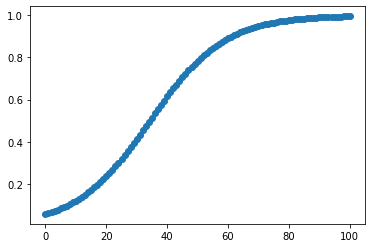

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list1, probs2[:, 1])